## Clustering jerárquico y dendrogramas (Aprendizaje no supervisado)
Antes de empezar, pongamos un poco de notación
* X dataset (array de nxm) de puntos a clusterizar
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


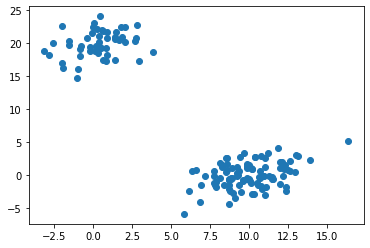

In [2]:
np.random.seed(4711) #para replicar resultados
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size = 100) #Normal en varias dimensiones centrada en 0,10
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size = 50) #Normal en varias dimensiones centrada en 0,20
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
Z = linkage(X,method='ward')

In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [5]:
c,coph_distance = cophenet(Z,pdist(X))
c #Precisión en la conservación de las distancias

0.9800148387574268

In [6]:
print(Z[152-len(X)]) #Cluster 152
print(Z[158-len(X)])#Cluster 158 

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [7]:
#Unio
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

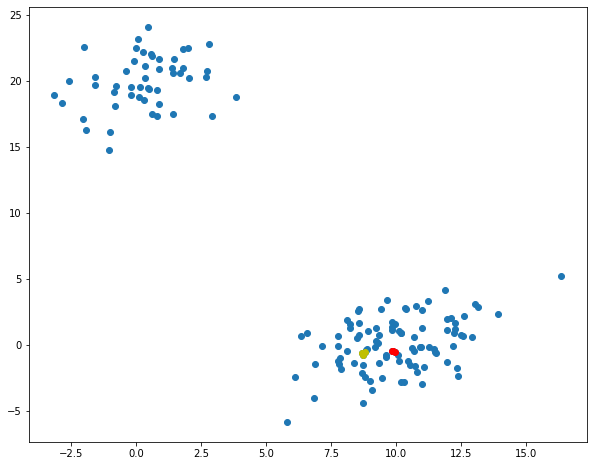

In [8]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1]) #pintas todos los puntos
plt.scatter(X[idx,0],X[idx,1],c='r') #Destacar en rojo puntos iteresantes los que se hiceron un cluster
plt.scatter(X[idx2,0],X[idx2,1],c='y') #Destacar en amarillo segundo cluster
plt.show()

### Representación gráfica de un dendrograma

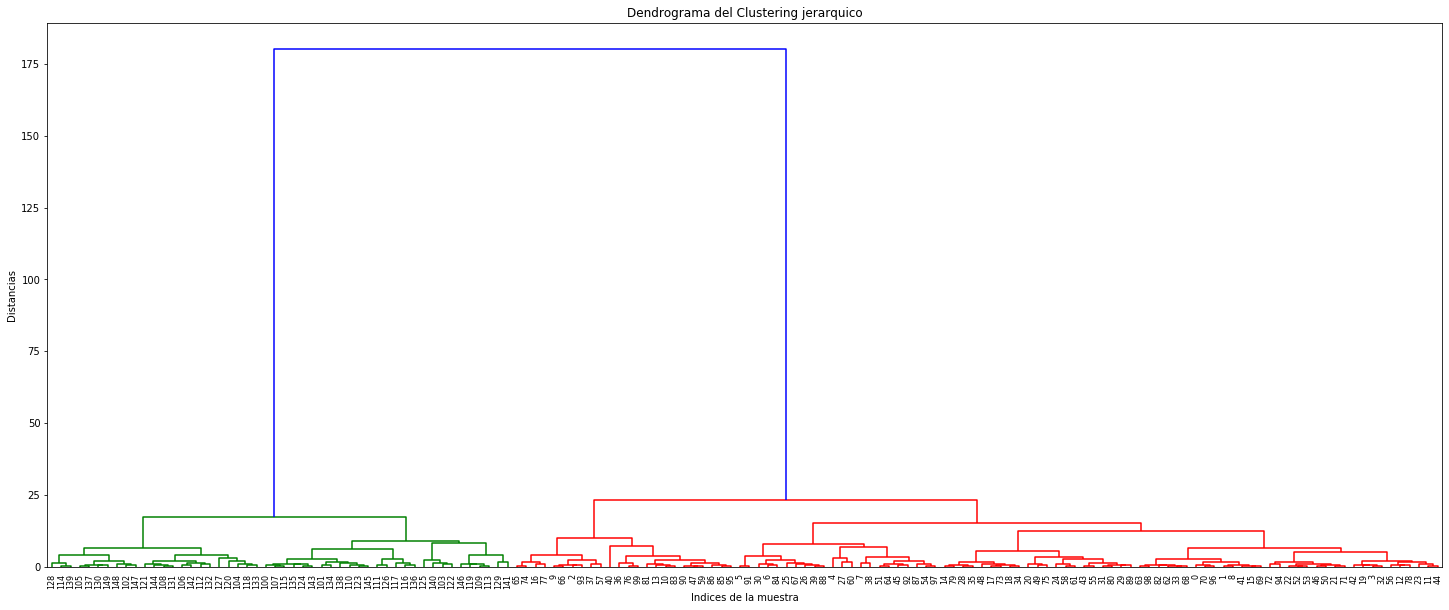

In [9]:
plt.figure(figsize=(25,10))
plt.title('Dendrograma del Clustering jerarquico')
plt.xlabel('Indices de la muestra')
plt.ylabel('Distancias')
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8.0,color_threshold=0.7*180) #la división esta dada por el 70% de la distancia maixma por defecto
plt.show()

In [10]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendrograma

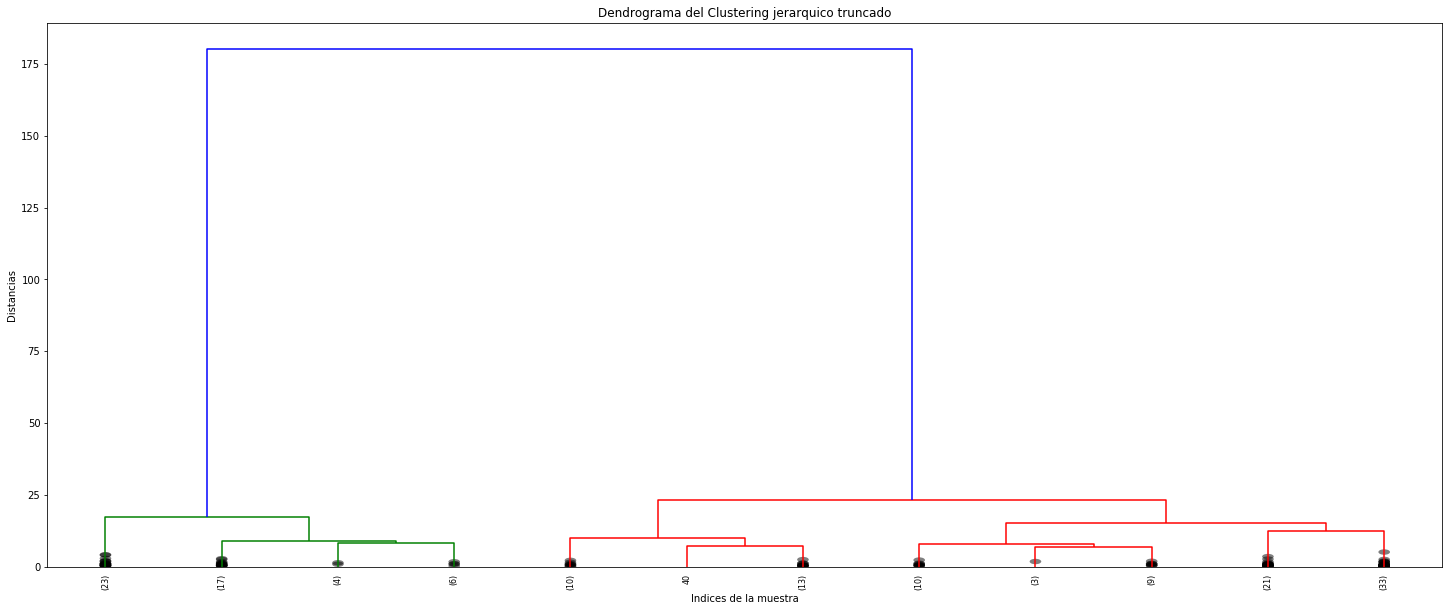

In [11]:
plt.figure(figsize=(25,10))
plt.title('Dendrograma del Clustering jerarquico truncado')
plt.xlabel('Indices de la muestra')
plt.ylabel('Distancias')
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8.0,color_threshold=0.7*180,truncate_mode='lastp',p=12,show_leaf_counts=True,show_contracted=True) 
plt.show() # se muestran las ultimas de ultimas uninones p = 10

### Dendrograma tuneado personalizado

In [12]:
def dendrogram_tune(*args,**kwargs):
    max_d = kwargs.pop('max_d',None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above',0)
    ddata = dendrogram(*args,**kwargs)
    if not kwargs.get('no_plot',False):
        plt.title('Clustering Jerarquico con Dendrograma truncado')
        plt.xlabel('índice del dataset (o tamaño del clsuter)')
        plt.ylabel('Distance')
        for i,d,c in zip(ddata['icoord'],ddata['dcoord'],ddata['color_list']):
            x = 0.5*sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y,(x,y),xytext=(0,-5),textcoords = 'offset points',va = 'top',ha = 'center') #máximo de 3 decimales la altura
    if max_d:
        plt.axhline(y = max_d,c='k')
    return ddata

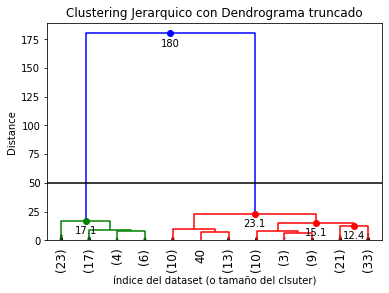

In [13]:
dendrogram_tune(Z,truncate_mode='lastp',p=12,leaf_rotation=90.,leaf_font_size=12.,show_contracted=True,annotate_above=10,max_d=50)
plt.show()

### Corte automatico del dendrograma

$inconsistency_i = (h_i-avg(h_i))/std(h_j)$

In [15]:
from scipy.cluster.hierarchy import inconsistent

In [19]:
depth = 3 # número de niveles por debajo
incons = inconsistent(Z,depth)
incons[-10:] ## el factor de inconsistencia es la última columna

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

### Método del codo

Es una grafica del número de clusters (k) vs $SS_w(k)$ o la suma de los cuadrados totales, definida por:  
$SS_w (k) = \sum_{j=1}^k SSw(C_j) = \sum_{j=1}^k \sum_{x \in C_j} (x_i -c_j)^2$  

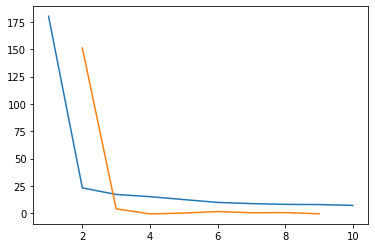

El número óptimo de cluster es:  2


In [26]:
last=Z[-10:,2]
last_rev = last[::-1]
idx = np.arange(1,len(last)+1)
plt.plot(idx,last_rev)
acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.argmax()+2
print('El número óptimo de cluster es: ',k)

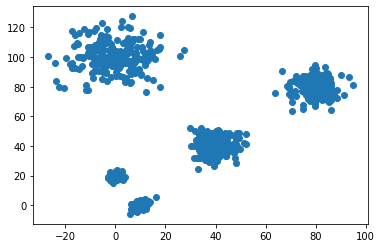

In [32]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]],size = [200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]],size = [200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]],size = [200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [34]:
Z2 = linkage(X2,'ward')

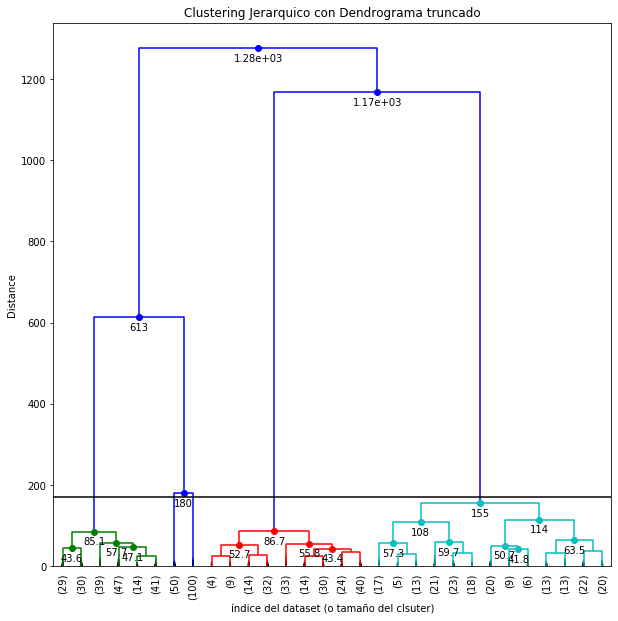

In [35]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode = 'lastp',
    p = 30,
    leaf_rotation = 90.,
    leaf_font_size = 10.,
    show_contracted = True,
    annotate_above = 40,
    max_d = 170
)
plt.show()

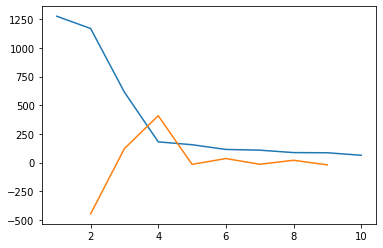

El número óptimo de cluster es:  4


In [36]:
last=Z2[-10:,2]
last_rev = last[::-1]
idx = np.arange(1,len(last)+1)
plt.plot(idx,last_rev)
acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.argmax()+2
print('El número óptimo de cluster es: ',k)

In [37]:
print(inconsistent(Z2,5)[-10:])

[[ 10.72039753  13.13572455  31.           4.01715167]
 [ 17.07320921  18.31715389  31.           3.71391179]
 [ 19.46107854  18.93084083  30.           3.55103812]
 [ 20.33693352  22.62414147  27.           3.86958898]
 [ 19.52516287  22.86311229  31.           4.1378394 ]
 [ 35.20430875  34.49273733  31.           3.47878232]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 43.36436468 111.08706744  31.           5.13107285]
 [ 79.83609308 204.76570457  31.           5.31595533]
 [146.44660961 307.26697271  31.           3.67415948]]


### Recuperar los clusters y sus elementos

In [38]:
from scipy.cluster.hierarchy import fcluster

In [44]:
max_d = 25 # altura a cortar el dendrograma
clusters = fcluster(Z,max_d,criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [41]:
k = 3 #cortar utiizando 3 clusters
clusters = fcluster(Z,k,criterion='maxclust')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
fcluster(Z,8,depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

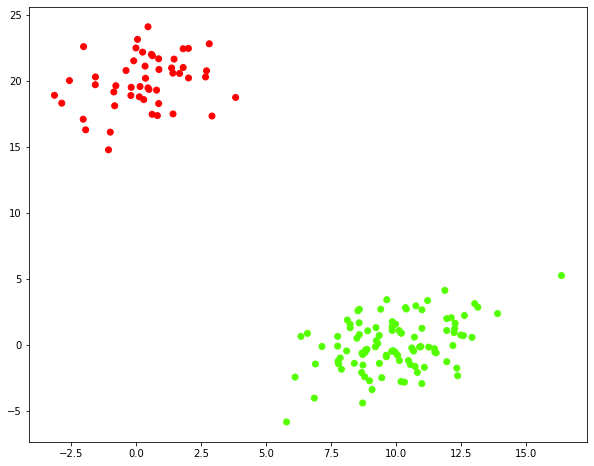

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c = clusters,cmap = "prism")
plt.show()

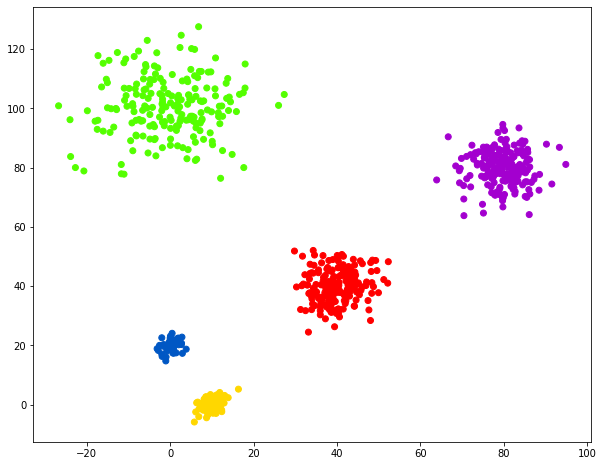

In [51]:
#Con el segundo grupo de datos
max_d_2 = 170
cluster_2 = fcluster(Z2,max_d_2,criterion='distance')

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0],X2[:,1],c = cluster_2,cmap = "prism")
plt.show()